https://github.com/thu-vu92/youtube-api-analysis

In [54]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
import numpy as np
from dateutil import parser

ModuleNotFoundError: No module named 'isodate'

In [16]:
api_key=''

In [17]:
channel_ids=[''] #find me in project folder

In [18]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [22]:
def get_channel_stats(youtube,channel_ids):
    all_data=[]

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=",".join(channel_ids)
    )
    response = request.execute()
    
    #loop through items
    for item in response['items']:
        data={'channelName':item['snippet']['title'],
              'subscribers':item['statistics']['subscriberCount'],
              'views':item['statistics']['viewCount'],
              'totalViews':item['statistics']['videoCount'],
              'playlistId':item['contentDetails']['relatedPlaylists']['uploads']
            
        }
        all_data.append(data)
    return(pd.DataFrame(all_data))

# JSON(response)

In [23]:
channel_stats=get_channel_stats(youtube,channel_ids)

In [24]:
channel_stats

,channelName,subscribers,views,totalViews,playlistId
0,Ali Abdaal,3400000,227658860,475,UUoOae5nYA7VqaXzerajD0lg


In [35]:
playlist_id='UUoOae5nYA7VqaXzerajD0lg'

def get_video_ids(youtube,playlist_id):
    video_ids=[]
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId="UUoOae5nYA7VqaXzerajD0lg",
        maxResults = 50
    )
    response = request.execute()
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
    next_page_token=response.get('nextPageToken')
    while next_page_token is not None:
        request=youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId=playlist_id,
                    maxResults=50,
                    pageToken=next_page_token)
        response=request.execute()
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        next_page_token=response.get('nextPageToken')
    
    return video_ids


In [36]:
video_ids = get_video_ids(youtube,playlist_id)

In [37]:
len(video_ids)

475

In [38]:
def get_video_details(youtube, video_ids):
    """
    Get video statistics of all videos with given IDs
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with statistics of videos, i.e.:
        'channelTitle', 'title', 'description', 'tags', 'publishedAt'
        'viewCount', 'likeCount', 'favoriteCount', 'commentCount'
        'duration', 'definition', 'caption'
    """
        
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
        return pd.DataFrame(all_video_info)

In [39]:
video_df=get_video_details(youtube,video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,5gT0x0EO9_8,Ali Abdaal,My Mindful & Productive Morning Routine,"To help you get started with braincare, go to ...","[Ali Abdaal, Ali abdal]",2022-09-30T13:54:41Z,240258,10605,None,659,PT10M22S,hd,false
1,ZaCNnliEW9A,Ali Abdaal,How To Retire Early - A Guide to Financial Fre...,Get a 14-day free trial of Shopify with this l...,"[Ali Abdaal, Ali abdal, how to retire early, r...",2022-09-24T14:37:42Z,191996,8307,None,447,PT14M43S,hd,false
2,DSTRL-bMOwY,Ali Abdaal,My London Studio Tour (2022),"The first 1,000 people to use the link will ge...","[Ali Abdaal, Ali abdal]",2022-09-18T13:45:01Z,122408,4535,None,385,PT32M8S,hd,false
3,rBp73KG1Ej0,Ali Abdaal,I Designed My Dream Product,Check out the designs over at dbrand - https:/...,"[Ali Abdaal, Ali abdal]",2022-09-16T16:02:58Z,105981,4914,None,328,PT6M43S,hd,false
4,JHKiDe8E4hY,Ali Abdaal,I Journaled Everyday for 90 Days. Here’s What ...,Sign up to Morning Brew for free today - https...,"[Ali Abdaal, Ali abdal]",2022-09-09T14:04:41Z,342136,13153,None,495,PT19M28S,hd,false
5,lJ6n52Lsjfo,Ali Abdaal,How To Find Your Perfect Career - The 3 Key Fa...,Head to https://80000hours.org/ali to start pl...,"[Ali Abdaal, Ali abdal]",2022-09-02T15:30:14Z,153953,6905,None,374,PT14M45S,hd,false
6,dPOX5SxcWUo,Ali Abdaal,How To Monetise Your Hobbies Successfully,Get a 14-day free trial of Shopify with this l...,"[Ali Abdaal, Ali abdal, how to make money onli...",2022-08-31T17:56:00Z,111329,5463,None,296,PT14M19S,hd,false
7,5bJ1aKd7xL8,Ali Abdaal,How to Make Money Online - The 3 Levels #shorts,So there are a number of ways that we can make...,"[Ali Abdaal, Ali abdal, make money online, how...",2022-08-30T16:29:26Z,85345,5964,None,60,PT50S,hd,false
8,-rbbOf5upaU,Ali Abdaal,27 Apps That Shaped My Life In 27 Minutes,Students can get 65% off the full version of C...,"[Ali Abdaal, Ali abdal]",2022-08-26T15:41:57Z,190990,7437,None,510,PT27M3S,hd,false
9,mWQTgSt7GeU,Ali Abdaal,How I Stopped Overthinking,Overthinking has nearly stopped me starting a ...,"[Ali Abdaal, Ali abdal]",2022-08-23T15:08:56Z,209666,11248,None,544,PT13M8S,hd,false


In [40]:
def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and associated top level comment in text.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)   

In [41]:
comments_df = get_comments_in_videos(youtube,video_ids)

In [42]:
comments_df['comments'][0]

['silly',
 'Dentist in training here - why do you swallow your toothpaste in the shower? 😅',
 'Nice video',
 'Did you just say swallow the toothpaste..?🤔 That cant be good😂',
 'Why do you swallow toothpaste',
 'YOU SWALLOW THE TOOTHPASTE???',
 'Love your videos',
 'I see you going towards non duality. Always thought youd get there slowly 👍👍',
 'you Get up & pray fajr time',
 "I'm excited to try out the journal thing of writing down the one big thing to do today! Great vid mate!"]

##  Data pre-processing

In [44]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [45]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [48]:
numeric_cols = ['viewCount','likeCount','favouriteCount','commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric,errors='coerce',axis=1)

In [51]:
# Create publish day (in the week) column
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [56]:
import isodate

In [57]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [58]:
# Add number of tags
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [59]:
# Comments and likes per 1000 view ratio
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [60]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [62]:
#add tag count
video_df['tagCount']=video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [61]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,5gT0x0EO9_8,Ali Abdaal,My Mindful & Productive Morning Routine,"To help you get started with braincare, go to ...","[Ali Abdaal, Ali abdal]",2022-09-30 13:54:41+00:00,240258.0,10605.0,NaN,659.0,PT10M22S,hd,false,Friday,622.0,2,44.140049,2.742885,39
1,ZaCNnliEW9A,Ali Abdaal,How To Retire Early - A Guide to Financial Fre...,Get a 14-day free trial of Shopify with this l...,"[Ali Abdaal, Ali abdal, how to retire early, r...",2022-09-24 14:37:42+00:00,191996.0,8307.0,NaN,447.0,PT14M43S,hd,false,Saturday,883.0,15,43.266526,2.328174,50
2,DSTRL-bMOwY,Ali Abdaal,My London Studio Tour (2022),"The first 1,000 people to use the link will ge...","[Ali Abdaal, Ali abdal]",2022-09-18 13:45:01+00:00,122408.0,4535.0,NaN,385.0,PT32M8S,hd,false,Sunday,1928.0,2,37.048232,3.145219,28
3,rBp73KG1Ej0,Ali Abdaal,I Designed My Dream Product,Check out the designs over at dbrand - https:/...,"[Ali Abdaal, Ali abdal]",2022-09-16 16:02:58+00:00,105981.0,4914.0,NaN,328.0,PT6M43S,hd,false,Friday,403.0,2,46.366802,3.094894,27
4,JHKiDe8E4hY,Ali Abdaal,I Journaled Everyday for 90 Days. Here’s What ...,Sign up to Morning Brew for free today - https...,"[Ali Abdaal, Ali abdal]",2022-09-09 14:04:41+00:00,342136.0,13153.0,NaN,495.0,PT19M28S,hd,false,Friday,1168.0,2,38.443777,1.446793,56


In [69]:
import seaborn as sns
import matplotlib.ticker as ticker

## Best performing videos

/Users/shengnan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9881 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shengnan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shengnan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shengnan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9881 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/shengnan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/shengnan/opt/anaconda3/lib/python3.8/site-packag

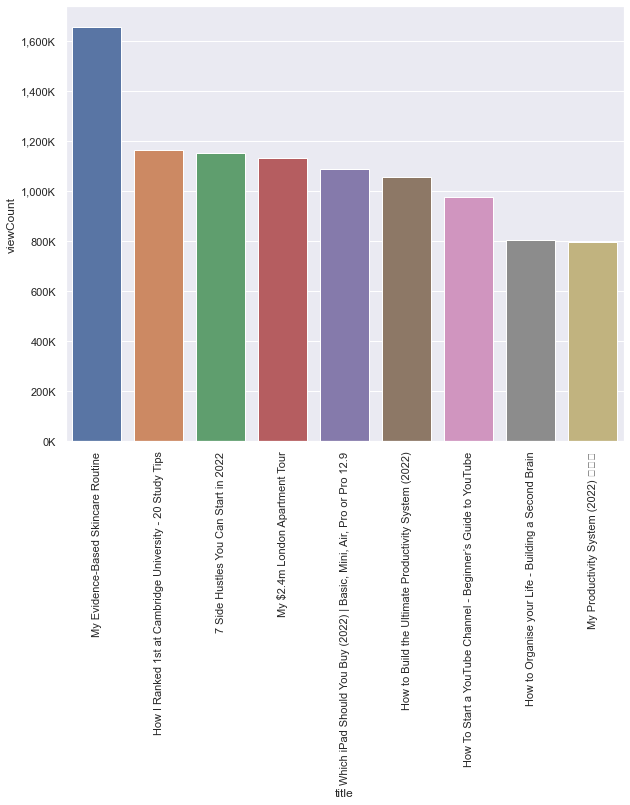

In [70]:
ax = sns.barplot(x='title',y='viewCount',data=video_df.sort_values('viewCount',ascending=False)[0:9])
sns.set(rc={'figure.figsize':(10,8)})
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:'{:,.0f}'.format(x/1000) +'K'))